# Plotting pull or push distributions

We will showcase how to use {func}`moscot.plotting.push` and {func}`moscot.plotting.pull` plotting functions.

:::{note}
These visualization functions are only implemented for non-spatial problems.
:::

To see how pull-back or push-forward cell distributions can be visualized for problems incorporating spatial information, please have a look at the {doc}`../../tutorials/index`. Here, we use the {func}`~moscot.datasets.hspc` dataset to demonstrate the usage of {func}`moscot.plotting.push` and {func}`moscot.plotting.pull` with the {class}`~moscot.problems.time.TemporalProblem`. In this context, the pull-back distribution corresponds to the set of ancestor cells, while the push-forward distribution corresponds to the set of descending cells.

## Imports and data loading

In [1]:
from moscot import datasets
from moscot.problems.time import TemporalProblem
import moscot.plotting

In [2]:
adata = datasets.hspc()

First, we need to prepare and solve the problem. Here, we set the ``threshold`` parameter to a relatively high value to speed up convergence at the cost of a lower quality solution.

In [3]:
tp = TemporalProblem(adata).prepare(time_key="day").solve(epsilon=1e-2, threshold=1e-2)

INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(766, 1235)].                                   
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(1235, 1201)].                                  
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(1201, 798)].                                   


As for all plotting functionalities in {mod}`moscot`, we first call the method of
the problem class, which stores the results of the computation in the {class}`~anndata.AnnData` instance. Let us assume we look for the descendants of cells of time point $4$ in time point $7$. We can specify whether we want to return the result via the ``return_data`` parameter.

In [4]:
tp.push(source=4, target=7, return_data=False)

We can now visualize the result. As we have multiple time points in the *UMAP* embedding, it is best to visualize in one plot all the cells corresponding to time point $4$, and then the ones corresponding to the descending cells. As the {class}`~anndata.AnnData` instance contains *UMAP* embeddings for both gene expression and *ATAC*, we need to define which one to use via the ``basis`` parameter.

/Users/michal/.mambaforge/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


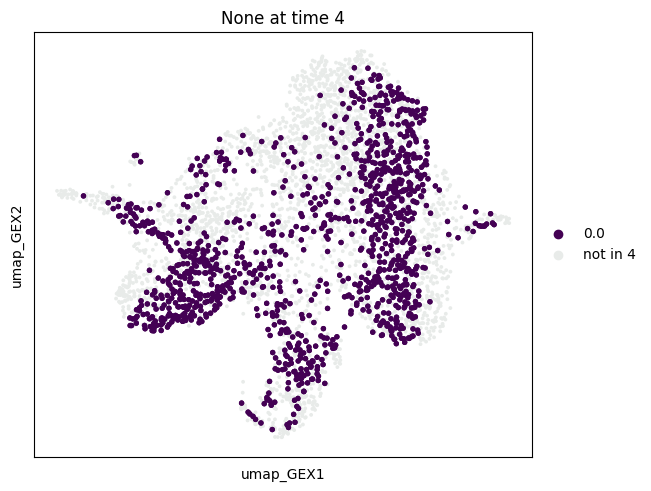

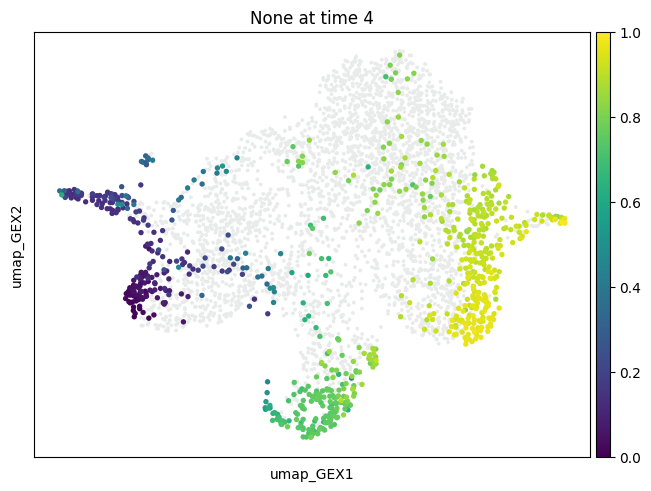

In [5]:
moscot.plotting.push(tp, time_points=[4], basis="umap_GEX")
moscot.plotting.push(tp, time_points=[7], basis="umap_GEX")

By default, the result of the {meth}`~moscot.problems.time.TemporalProblem.push` method of the {class}`~moscot.problems.time.TemporalProblem` instance is saved in {attr}`anndata.AnnData.uns` ``['moscot_results']['push']['push']`` and overrides this element every time the method is called. To prevent this, we can specify the parameter ``key_added``, as shown below.

We can also visualize the descendants of only a subset of categories of an {attr}`anndata.AnnData.obs` column by specifying the ``data`` and the ``subset`` parameter.

/Users/michal/.mambaforge/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


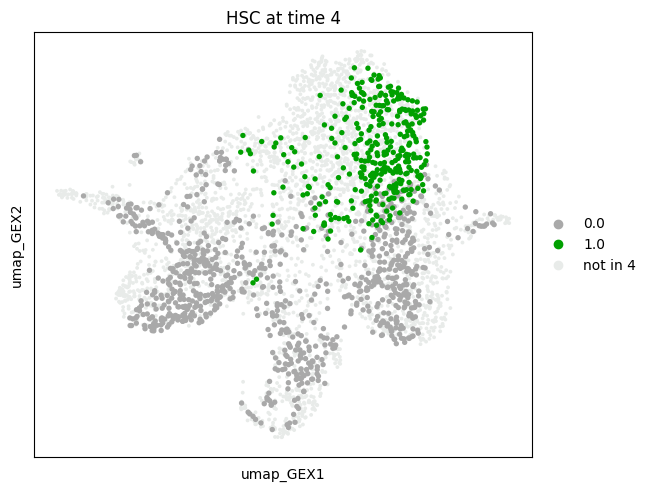

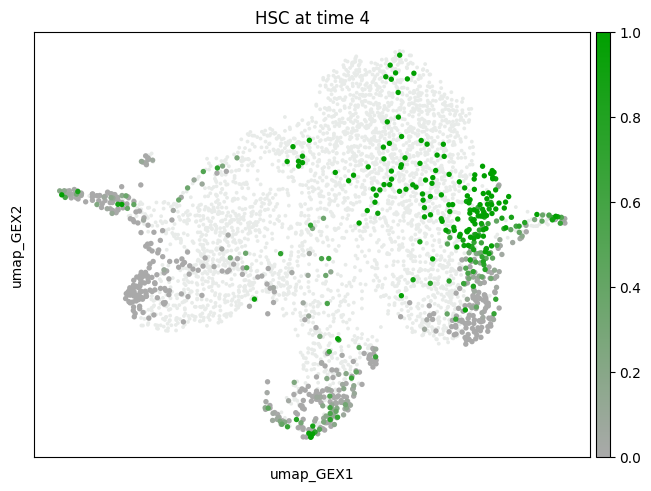

In [6]:
new_key = "subset_push"
tp.push(source=4, target=7, data="cell_type", subset="HSC", return_data=False, key_added=new_key)
moscot.plotting.push(tp, time_points=[4], uns_key=new_key, basis="umap_GEX")
moscot.plotting.push(tp, time_points=[7], uns_key=new_key, basis="umap_GEX")